# Jump height in Counter Movement Jumps
In this notebook, we show you how to calculate the jump height in counter movement jumps using the flight time. 

### Import libraries
First, we import the 'pandas' package for data wrangling and 'matplotlib' for plotting.

*Note: So called libraries or modules are a collection of additional functions that can be imported for use in your code. If they don't come preinstalled with your Python distribution you can install them for example by using conda.*

In [6]:
import pandas as pd                 # to handle data
import matplotlib.pyplot as plt     # to plot data

### Import data

Next, our data can be easily imported using pandas `read_csv()` function. We need to specify the decimal symbol to `,` and the delimiters to `;` because the defaults are `.` and `,` respectively. We set the index of our dataframe to the time, so we can access and plot our data by time, not row indices.

In [7]:
#data = pd.read_csv('data-cmj/ID1_CMJ_1.csv', decimal=',', delimiter=';')

data = pd.read_csv('data-cmj/ID1_CMJ_1.csv', decimal=',', delimiter=';', index_col='Zeit')

data

,Nr.,x1,x2,y1,y2,z1,z2,z3,z4,U1,U2
Zeit,,,,,,,,,,,
0.0005,1,0.2,0.9,-0.1,-0.1,1.6,-9.6,-4.0,10.0,-0.0061,0.0065
0.0010,2,0.2,0.5,-0.1,-0.1,1.6,-4.0,-6.8,10.0,-0.0061,0.0065
0.0015,3,0.2,0.9,-0.1,-0.1,4.4,-4.0,-6.8,4.4,-0.0061,0.0090
0.0020,4,0.2,0.9,0.2,0.2,1.6,-4.0,-4.0,10.0,-0.0061,0.0065
0.0025,5,-0.1,0.2,-0.1,0.5,1.6,-1.2,-4.0,12.8,-0.0036,0.0065
...,...,...,...,...,...,...,...,...,...,...,...
3.0975,6195,0.5,3.2,-23.4,-9.6,-88.0,-211.2,38.0,225.6,0.0367,0.2057
3.0980,6196,0.5,2.5,-23.7,-9.2,-88.0,-211.2,40.8,228.4,0.0367,0.2032
3.0985,6197,0.5,2.5,-23.4,-9.9,-88.0,-211.2,38.0,225.6,0.0342,0.2032


### Calculate vertical force
Calculating the resulting vertical force is straightforward: We sum up the vertical force values from all four sensors. Next, we plot the vertical force, also called $ F_z $:

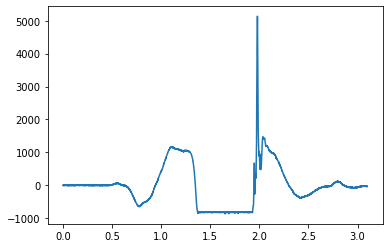

In [8]:
# Creating resultant Z force by simple additon
data['Z'] = data['z1'] + data['z2'] + data.z3 + data.z4     # different ways to access columns

# for plotting the matplotlib library is very convenient
plt.plot(data.Z)


### Get body weight
We can see two plateaus in the data: The first, when the person stands still, the second, being in the air. While the first plateau centers at zero, we can extract the body weight from the second plateau from the measured vertical force. We simply need to divide by the gravitional constant $ g \approx 9.81 \frac{m}{s} $. Note, that we have to take the absolute value when converting to $ kg $. 

Before, we need to obtain a reliable value of the vertical force that indicates our body weight and, hence, the value we use to calculate flight time. In this case, we use a rolling average over 20 data points and extract the minimum value to get a sensible value for the second plateau and further calculations

In [9]:

# find bodyweight by mean of 0.25 seconds after user clicks on graph
#plt.title('click to specify the first point from which bw is calculated')
# temp_coord = plt.ginput(1, timeout=-1)
#bw_coord = round(temp_coord[0][0], 3)   # remember the pyplot ginput() function returns a list of tuples
#plt.show()  # the pyplot show function is needed to display a plot

bw = data['Z'].rolling(20).mean().min()
bm = abs(bw / 9.81)     # body mass in kg

print(f"weight: {round(bm,1)} kg")



weight: 83.9 kg


### Calculate flight time and jump height
With knowledge about the approximate value for the second plateau, we can determine it´s length and, therefore, the flight time. We use the `.lt()` function from `pandas` to extract all values that are lower than body weight together with our defined threshold of 10 N*. We can obtain the flight time `fj` by subtracting the last (`landing`) from the first (`take_off`) value. Further, we use the converted formula for the free fall to calculate jump height: 

$$ jump \ height = \frac{1}{8} * g * ft² $$

*Note, for convenience, with this method we could obtain values that don´t fall in the first plateau that are lower as this threshold. This could occur, when the person is not standing on the force plate other than jumping (eg, not standing on the force plate at the beginning or stepping off the force plate after the jump too early)



In [10]:
# filters for values less than bw + 10
flight_period = data.index[data.Z.lt(bw+10)]

# take first and last value
take_off = flight_period[0]  
landing = flight_period[-1] 

# flight time method to calculate jump height
ft = landing - take_off
jh = 1/8 * 9.81 * ft**2

print(f"A flight time of {round(ft,2)} s yields a jump height of {round(jh,2)} m")

A flight time of 0.56 s yields a jump height of 0.38 m


ab hier löschen?

Force: 1165.6 N


([<matplotlib.axis.XTick at 0x18b73e38550>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

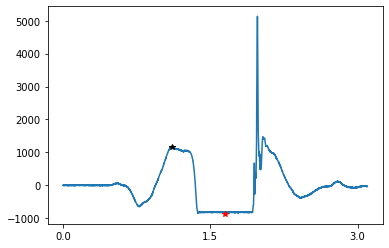

In [11]:
# find maximum force before takeoff: idea it must be before the lowest force, therefore let's slice the data in that way
# df.min(), df.max(), df.idxmin(), df.idxmax() are functions to get minimum values and indeces in a pandas data frame
min_idx = data.Z.idxmin()
min_z = data.Z.min()
max_to = data.Z[:min_idx].max()
max_to_idx = data.Z[:min_idx].idxmax()
print("Force:",max_to,"N")

plt.plot(data.Z)
plt.plot(min_idx, min_z, '*r')  # defining a color and shape of a single data point in a plot
plt.plot(max_to_idx, max_to, '*k')
plt.xticks([0.000, 1.5, 3])

